In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
df["Age"].dtype


dtype('int64')

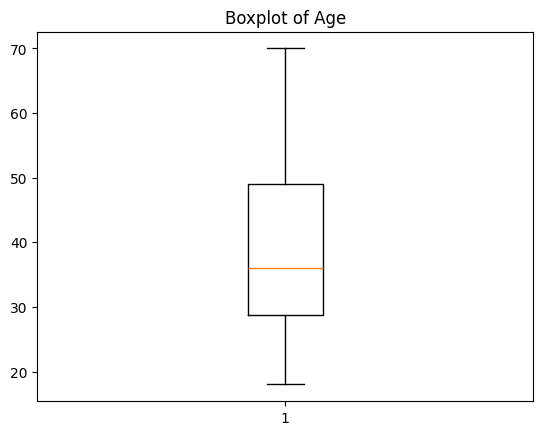

In [17]:

plt.boxplot(df["Age"])
plt.title("Boxplot of Age")
plt.show()

In [18]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 50, 70], labels=['18-25','26-35','36-50','51-70'])


In [19]:
df['IncomeGroup'] = pd.cut(df['Annual Income (k$)'], bins=[0, 40, 70, 120], labels=['Low','Medium','High'])


In [20]:
df['SpendingCategory'] = pd.cut(df['Spending Score (1-100)'], bins=[0, 40, 70, 100], labels=['Low','Medium','High'])


In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols = ["Gender", "IncomeGroup", "SpendingCategory"]

for col in cat_cols:
    df[col] = le.fit_transform(df[col]) 


In [27]:
df['Age_Income'] = df['Age'] * df['Annual Income (k$)']


In [35]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,IncomeGroup,SpendingCategory,Age_Income
0,1,1,19,15,39,18-25,1,1,285
1,2,1,21,15,81,18-25,1,0,315
2,3,0,20,16,6,18-25,1,1,320
3,4,0,23,16,77,18-25,1,0,368
4,5,0,31,17,40,26-35,1,1,527


In [34]:
df.drop("Gender_encoded", axis=1, inplace=True)


In [36]:
df.to_csv("clean_Mall_customers.csv", index=False)